# Logistic Regression

In this section we will implement the logistic regression algorithm using Python's Scikit-Learn library. In the following examples we'll solve classification problem using the logistic regression.

In [151]:
import pandas as pd

dataset = pd.read_csv('frogs_mfcc.csv')
dataset

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,ScinaxRuber


### Feature selection
We used a heatmap to help us visualize the correleration of each feature to it's output. As we can see from the heatmap generated below, almost every feature have a correleration to each other.

In this case, we used ANOVA feature selection method to select our features. This is because ANOVA feature selection works well with numerical input, but categorical output. We chose to have a maximum of 17 features selected is because after testing, we found out that roughly 17 features produces the best accuracy for our model.

#### Reference
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/ 

<AxesSubplot:>

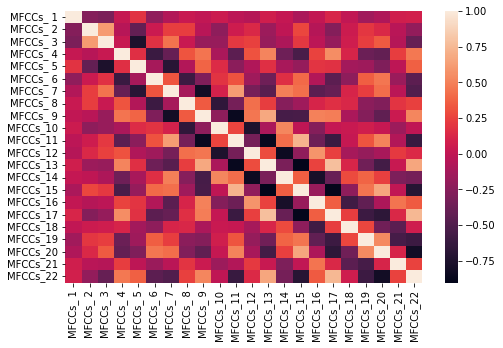

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(dataset.corr())

In [153]:
X = dataset.iloc[:, 0:22]
y = dataset.iloc[:, 22]
X.head(2)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056


In [154]:
from sklearn.feature_selection import SelectKBest, f_classif

feature_selection = SelectKBest(score_func=f_classif, k=17)
X = feature_selection.fit_transform(X, y)

### Split dataset

We will now split the dataset into training and test set

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Finding Optimal Parameter
Here we use GridSearchCV to obtain the optimal parameters. 
(SOS)We changed the maximum iterations for the model to 10000 because if the number is too low, there will be a optimization haven't converge warning?????

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

model = LogisticRegression(max_iter=10000) ## THIS raise error? @TODO
model_cv = GridSearchCV(model,grid,cv=10)

model_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :",model_cv.best_score_)


# Using best parameter to make new predictions
y_pred_new = model_cv.predict(X_test)

C:\Users\CHIN WEI RU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\CHIN WEI RU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CHIN WEI RU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\CHIN WEI RU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\CHIN WEI RU\anaconda3\lib\site-packa

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.9594958029600178


### Model Evaluation

This section we will evaluate the model

In [158]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred_new))
print(confusion_matrix(y_test, y_pred_new))

                        precision    recall  f1-score   support

        AdenomeraAndre       0.93      0.94      0.93       188
AdenomeraHylaedactylus       1.00      0.99      1.00      1039
    Ameeregatrivittata       0.93      0.93      0.93       163
            HylaMinuta       0.87      0.83      0.85        92
  HypsiboasCinerascens       0.95      0.93      0.94       129
     HypsiboasCordobae       0.97      0.99      0.98       351
   LeptodactylusFuscus       0.95      0.96      0.95        92
 OsteocephalusOophagus       0.87      0.79      0.83        33
     Rhinellagranulosa       0.82      0.82      0.82        22
           ScinaxRuber       0.93      1.00      0.96        50

              accuracy                           0.97      2159
             macro avg       0.92      0.92      0.92      2159
          weighted avg       0.97      0.97      0.97      2159

[[ 176    0    5    2    1    0    0    3    0    1]
 [   0 1033    0    2    1    1    0    0    0  

### Data visualization

This section will visualize the percentages of each species in the dataset.

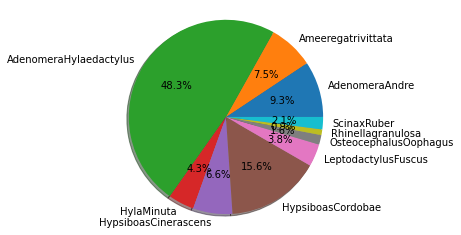

In [159]:
import matplotlib.pyplot as plt

sizes = [dataset["Species"].value_counts()[unique_class]*100/len(dataset["Species"]) for unique_class in y.unique()]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=y.unique(), autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.show()